# Interpolation
VTools provides a number of interpolators that augment the regular offerings of Pandas, including functions for interpolating directly to a new index, downsampling period averaged data, and performing accurate monotonicity preserving interpolation. These topics are covered here, beginning with standard pandas interpolation and some of its gotchas. 

## Pandas interpolation with `df.interpolate()` and `df.asfreq().interpolate()`
These two functions fit different situations but do largely the same work. `df.interpolate()` is most useful for filling gaps in a series and `df.asfreq().interpolate()` is used for downsampling in time and produces a regular series. The default is linear interpolation and the interpolation will span an arbitrary count of data. 

In [1]:
print("hello")

hello


O1 6.7597741241891e-05 0.3775 96
K1 7.292116029712528e-05 0.6 105.0
M2 0.00014051890153901625 1.4175 336.0
S2 0.0001454441043328608 0.33675 336.0


<Axes: >

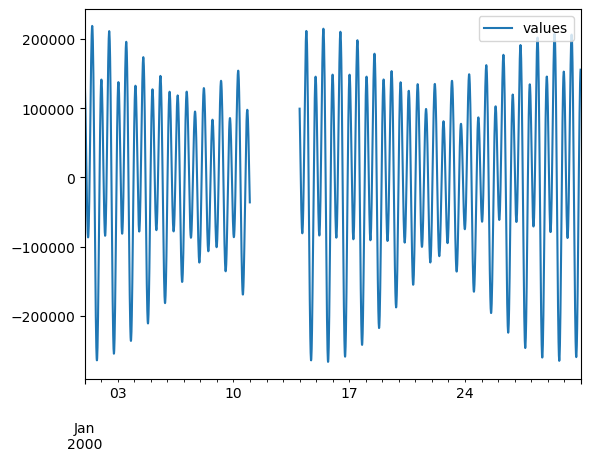

In [2]:
from vtools.data.sample_series import small_subtide
ts = small_subtide(subtide_scale=0.)
ts.plot()

### The `limit` argument and why it is needed
As is clear from the example, interpolation of tidal data beyond an hour can be very inaccurate. The inaccuracy can be controlled by use of the `limit` argument which will describe how many time points will be filled. The difference is shown before, first for the synthetic tidal series and then for a tidal filtration. The filtered example is shown because it is always tempting to fill missing data before performing a convolution based filtration because these types of filters will expand the size of a gap. Note that here, while the interpolated data is within the convolution length of the filter, distortion results. The series has no subtidal component, so a correct filteration would result in a flat line at zero. 

### Alternatives to linear interpolation

## Interpolating to a new, irregular index
Pandas `df.asfreq().interpolate()` does a great job of creating a regular series with a new time interval, with functionality largely similar to the discussion above. However, the Pandas workflow is tedious for the chore of interpolating a series to a new irregular index. 

## Interpolating/Downsampling Period Averaged Data
It is often the case that data comes in as an aggregated quantity, such as a daily or monthly average. The question then becomes: how to downsample this to a finer interval. Generally the requirements for this task are accuracy, positivity preservation, smoothness or flatness and conservation of the "mass" of the signal within periods. These are not necessarily met simultaneously. We can consider a typical fallback (forward fill into piecewise constant), as well as VTools alternatives:
- `rhistinterp`, which emphasizes conservation and positivity preservation. It has a parameter $p$ that when set high will apply tension to the series, attempting to steer values away from zero but also reducing accuracy and degenerating towards flat lines.
- backfill plus `ts_gaussian_inpter1D` which does not conserve mass within the original period boundaries, but is fully positivity preserving. This function uses a Gaussian convolution filter to smooth out values. It requires that you choose a `sigma`, in number of time steps, which determines the width of the Gaussian filter. 


First we consider a signal that is not naturally flat -- tidally filtered discharge at Freeport on the Sacramento River between ** and **. We load this data, monthly average it, then reconstruct it with the three inerpolants. 



This examples shows off a point that is often neglected in practical work for one reason or another: flat lines are a terrible representation. Commonly it is thought that this approach doesn't add knowledge, but it does. It adds *wrong* knowledge that the series is flat. Of course, not all time series are like this.

The `rhistinterp` example with a very high value of $p$ and the ffill + Gauassian approach are qualitatively similar. In practice, the `rhistinterp` way of doing things is more accurate, and it works for many series, but can fail for series that lurch up and down. Setting the `max_iter` parameter higher or using a higher starting value of `p` may help. `ts_gaussian_interp1D` is more guaranteed to work, and is a good choice for rounding out a series that can otherwise be flat (e.g. start up of export pumps). 

